<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TensorFlow2/Tutorial/Additional_callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Additional callbacks

In this reading we'll be looking at more of the inbuilt callbacks available in Keras.

In [1]:
#### Package imports ####

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler,\
    CSVLogger, LambdaCallback, ReduceLROnPlateau

2.3.0


We will again be using the sklearn diabetes dataset to demonstrate these callbacks.

In [2]:
# Load the diabetes dataset
diabetes_dataset = load_diabetes()
# Save the input and target variables
data = diabetes_dataset['data']
target = diabetes_dataset['target']
# Split the data set into training and test sets
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.1)

Let's also build a simple model to fit the data with our callbacks.

In [3]:
def get_model():
    # Build the model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1)])
    # Compile the model
    model.compile(loss='mse', optimizer='adam', 
        metrics=['mse', 'mae'])
    return model

We plot training and validation loss and accuracy to observe how the accuracy of our model improves over time.

In [4]:
# Plot the learning curves
def plot_history(history):
    frame = pd.DataFrame(history.history)
    epochs = np.arange(len(frame))
    fig = plt.figure(figsize=(12,4))
    # Loss plot
    ax = fig.add_subplot(121)
    ax.plot(epochs, frame['loss'], label='Train')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Loss vs Epochs')
    ax.legend()
    # Accuracy plot
    ax = fig.add_subplot(122)
    ax.plot(epochs, frame['mae'], label='Train')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Mean Absolute Error')
    ax.set_title('Mean Absolute Error vs Epochs')
    ax.legend()
    plt.show()

## Learning rate scheduler

**usage:** `tf.keras.callbacks.LearningRateScheduler(schedule, verbose=0)`

The learning rate scheduler that we implemented in the previous reading as a custom callback is also available as a built in callback.

As in our custom callback, the `LearningRateScheduler` in Keras takes a function `schedule` as an argument.

This function `schedule` should take two arguments:
* The current epoch (as an integer), and
* The current learning rate,
and return new learning rate for that epoch.

The `LearningRateScheduler` also has an optional `verbose` argument, which prints information about the learning rate if it is set to 1.

Let's see a simple example.

In [5]:
# Define the learning rate schedule function
def lr_function(epoch, lr):
    if epoch%2==0:
        return lr
    else:
        return lr + epoch/1000


Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0020000000474974513.

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0020000000949949026.

Epoch 00004: LearningRateScheduler reducing learning rate to 0.005000000094994903.

Epoch 00005: LearningRateScheduler reducing learning rate to 0.004999999888241291.

Epoch 00006: LearningRateScheduler reducing learning rate to 0.009999999888241292.

Epoch 00007: LearningRateScheduler reducing learning rate to 0.009999999776482582.

Epoch 00008: LearningRateScheduler reducing learning rate to 0.01699999977648258.

Epoch 00009: LearningRateScheduler reducing learning rate to 0.016999999061226845.

Epoch 00010: LearningRateScheduler reducing learning rate to 0.025999999061226846.


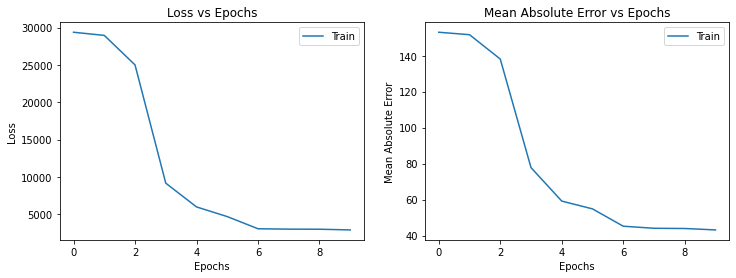

In [6]:
# Train the model
model = get_model()
history = model.fit(train_data, train_target, epochs=10,
    callbacks=[LearningRateScheduler(lr_function, verbose=1)],
    verbose=False)
# Plot the history
plot_history(history)

You can also use lambda functions to define your schedule given an epoch.


Epoch 00001: LearningRateScheduler reducing learning rate to 0.3333333333333333.

Epoch 00002: LearningRateScheduler reducing learning rate to 0.125.

Epoch 00003: LearningRateScheduler reducing learning rate to 0.07692307692307693.

Epoch 00004: LearningRateScheduler reducing learning rate to 0.05555555555555555.

Epoch 00005: LearningRateScheduler reducing learning rate to 0.043478260869565216.

Epoch 00006: LearningRateScheduler reducing learning rate to 0.03571428571428571.

Epoch 00007: LearningRateScheduler reducing learning rate to 0.030303030303030304.

Epoch 00008: LearningRateScheduler reducing learning rate to 0.02631578947368421.

Epoch 00009: LearningRateScheduler reducing learning rate to 0.023255813953488372.

Epoch 00010: LearningRateScheduler reducing learning rate to 0.020833333333333332.


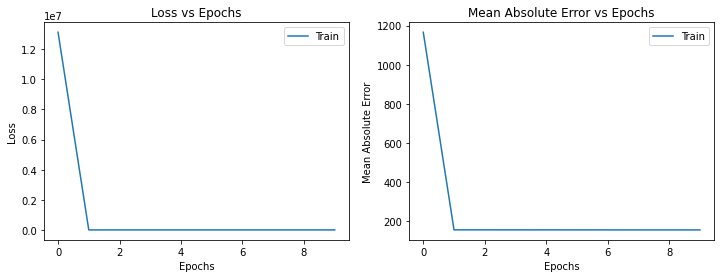

In [7]:
# Train the model with a difference schedule
model = get_model()
history = model.fit(train_data, train_target, epochs=10,
    callbacks=[LearningRateScheduler(lambda x:1/(3+5*x), verbose=1)],
    verbose=False)
# Plot the history
plot_history(history)

## CSV logger
**Usage** `tf.keras.callbacks.CSVLogger(filename, separator=',', append=False)`

This callback streams the results from each epoch into a CSV file. The first line of the CSV file will be the name of pieces of information recorded on each subsequent line, begining with the epoch and loss value. The values of metrics at the end of each epoch will also be recorded.

The only compulsory argument is the `filename` for the log to be streamed to. This could also be a filepath.

You can also specify the `separator` to be used between entries on each line.

The `append` argument allows you the option to append your results to an existing file with the same name. This can be particularly useful if you are continuing training.

Let's see an example. Let's view the information in the CSV file we have created using `pandas`.

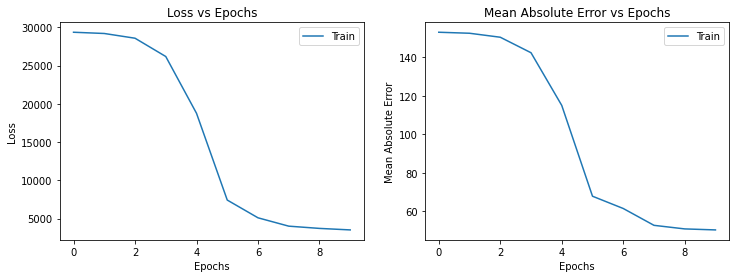

In [8]:
# Train the model with a CSV logger
model = get_model()
history = model.fit(train_data, train_target, epochs=10,
    callbacks=[CSVLogger("results.csv")], verbose=False)

# Load the CSV
frame = pd.read_csv("results.csv", index_col='epoch')
epochs = np.arange(len(frame))
fig = plt.figure(figsize=(12,4))
# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label='Train')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Loss vs Epochs')
ax.legend()
# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label='Train')
ax.set_xlabel('Epochs')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Mean Absolute Error vs Epochs')
ax.legend()
plt.show()

In [9]:
# Clear file
! rm results.csv

## Lambda callbacks
**Usage** `tf.keras.callbacks.LambdaCallback(
    on_epoch_begin=None, on_epoch_end=None,
    on_batch_begin=None, on_batch_end=None,
    on_train_begin=None, on_train_end=None)`
    
Lambda callbacks are used to quickly define simple custom callbacks with the use of lambda functions.

Each of the functions require some positional arguments.
* `on_epoch_begin` and `on_epoch_end` expect two arguments: `epoch` and `logs`,
* `on_batch_begin` and `on_batch_end` expect two arguments: `batch` and `logs` and 
* `on_train_begin` and `on_train_end` expect one argument: `logs`.

Let's see an example of this in practice.

Starting Epoch 1!

 After batch 0, the loss is 30420.04.

 After batch 1, the loss is 30595.87.

 After batch 2, the loss is 28339.40.

 After batch 3, the loss is 29387.06.
Starting Epoch 2!

 After batch 0, the loss is 25422.80.

 After batch 1, the loss is 26099.51.

 After batch 2, the loss is 27868.13.

 After batch 3, the loss is 29362.64.
Starting Epoch 3!

 After batch 0, the loss is 29833.30.

 After batch 1, the loss is 29819.44.

 After batch 2, the loss is 29097.78.

 After batch 3, the loss is 29326.34.
Starting Epoch 4!

 After batch 0, the loss is 30395.15.

 After batch 1, the loss is 29467.48.

 After batch 2, the loss is 29716.99.

 After batch 3, the loss is 29268.53.
Starting Epoch 5!

 After batch 0, the loss is 35012.51.

 After batch 1, the loss is 31253.30.

 After batch 2, the loss is 29433.95.

 After batch 3, the loss is 29178.06.
Training finished


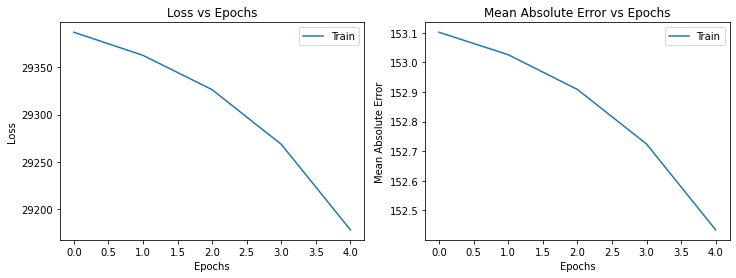

In [10]:
# Print the epoch number at the beginning of each epoch
epoch_callback = LambdaCallback(on_epoch_begin = 
    lambda epoch, logs: print('Starting Epoch {}!'.format(epoch+1)))
# Print the loss at the end of each batch
batch_loss_callback = LambdaCallback(on_batch_end = 
    lambda batch, logs: print('\n After batch {}, the loss is {:7.2f}.'
    .format(batch, logs['loss'])))
# Inform that training is finished
train_finish_callback = LambdaCallback(on_train_end = 
    lambda logs: print('Training finished'))
# Train the model with the lambda callbacks
model = get_model()
history = model.fit(train_data, train_target, epochs=5, batch_size=100,
    verbose=False, callbacks=[epoch_callback, batch_loss_callback, 
        train_finish_callback])
# Plot the history
plot_history(history)

## Reduce learning rate on plateau
**Usage** `tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
    factor=0.1, patience=10, verbose=0, mode='auto', 
    min_delta=0.0001, cooldown=0, min_lr=0)`
    
The `ReduceLROnPlateau` callback allows reduction of the learning rate when a metric has stopped improving.
The arguments are similar to those used in the `EarlyStopping` callback.
* The argument `monitor` is used to specify which metric to base the callback on.
* The `factor` is the factor by which the learning rate decreases i.e., new_lr=factor*old_lr.
* The `patience` is the number of epochs where there is no improvement on the monitored metric before the learning rate is reduced.
* The `verbose` argument will produce progress messages when set to 1.
* The `mode` determines whether the learning rate will decrease when the monitored quantity stops increasing (`max`) or decreasing (`min`). The `auto` setting causes the callback to infer the mode from the monitored quantity.
* The `min_delta` is the smallest change in the monitored quantity to be deemed an improvement.
* The `cooldown` is the number of epochs to wait after the learning rate is changed before the callback resumes normal operation.
* The `min_lr` is a lower bound on the learning rate that the callback will produce.

Let's examine a final example.

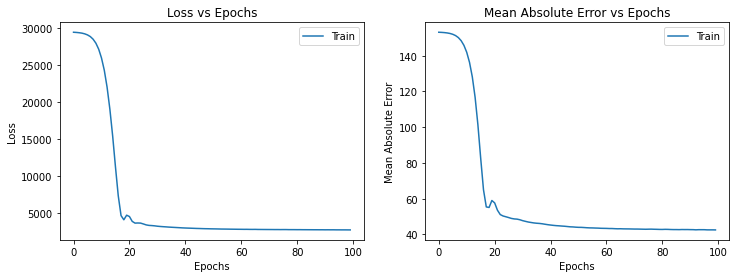

In [11]:
# Train the model with the ReduceLROnPlateau callback
model = get_model()
history = model.fit(train_data, train_target, epochs=100, 
    batch_size=100, verbose=False, callbacks=[ReduceLROnPlateau(
        monitor='loss', factor=0.2, verbose=1)])
# Plot the history
plot_history(history)

### Further reading and resources

* https://keras.io/callbacks/
* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler
* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/CSVLogger
* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LambdaCallback